In [1]:
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from pyomo.network import Arc, SequentialDecomposition

from idaes.core.util.initialization import propagate_state

# Import plotting functions
import matplotlib.pyplot as plt

# Import numpy library 
import numpy as np

# Import the main FlowsheetBlock from IDAES. The flowsheet block will contain the unit model
from idaes.core import FlowsheetBlock

import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus

# Import the degrees_of_freedom function from the idaes.core.util.model_statistics package
# DOF = Number of Model Variables - Number of Model Constraints
from idaes.core.util.model_statistics import degrees_of_freedom

# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)

# Import unit models from the model library
from idaes.generic_models.unit_models import Flash

# Import R32, R125, IL info file
from HFCs_bmimPF6_PR import configuration

from HFCs_bmimBF4_PR import configuration as configurationBF4

from HFCs_bmimAc_PR import configuration as configurationAc

from HFCs_emimTf2N_PR import configuration as configurationTf2N

from HFCs_hmimCl_PR import configuration as configurationCl

from HFCs_hmimFAP_PR import configuration as configurationFAP

In [2]:
mPF6 = ConcreteModel()
mPF6.fs = FlowsheetBlock(default={"dynamic": False})
mPF6.fs.properties = GenericParameterBlock(default=configuration)
mPF6.fs.F101 = Flash(default={"property_package": mPF6.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

mBF4 = ConcreteModel()
mBF4.fs = FlowsheetBlock(default={"dynamic": False})
mBF4.fs.properties = GenericParameterBlock(default=configurationBF4)
mBF4.fs.F101 = Flash(default={"property_package": mBF4.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

mAc = ConcreteModel()
mAc.fs = FlowsheetBlock(default={"dynamic": False})
mAc.fs.properties = GenericParameterBlock(default=configurationAc)
mAc.fs.F101 = Flash(default={"property_package": mAc.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

mTf2N = ConcreteModel()
mTf2N.fs = FlowsheetBlock(default={"dynamic": False})
mTf2N.fs.properties = GenericParameterBlock(default=configurationTf2N)
mTf2N.fs.F101 = Flash(default={"property_package": mTf2N.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

mCl = ConcreteModel()
mCl.fs = FlowsheetBlock(default={"dynamic": False})
mCl.fs.properties = GenericParameterBlock(default=configurationCl)
mCl.fs.F101 = Flash(default={"property_package": mCl.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

mFAP = ConcreteModel()
mFAP.fs = FlowsheetBlock(default={"dynamic": False})
mFAP.fs.properties = GenericParameterBlock(default=configurationFAP)
mFAP.fs.F101 = Flash(default={"property_package": mFAP.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

In [3]:
mPF6.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
mPF6.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
mPF6.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(-0.026088)
mPF6.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(-0.070405)
mPF6.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(0.345)
mPF6.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(0.058856)

mBF4.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
mBF4.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
mBF4.fs.properties.PR_kappa_A['bmimBF4', 'R32'].fix(-0.028253)
mBF4.fs.properties.PR_kappa_A['R32', 'bmimBF4'].fix(-0.006843)
mBF4.fs.properties.PR_kappa_A['bmimBF4', 'R125'].fix(0.57152)
mBF4.fs.properties.PR_kappa_A['R125', 'bmimBF4'].fix(0.06453)

mAc.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
mAc.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
mAc.fs.properties.PR_kappa_A['bmimAc','R32'].fix(-0.562777)
mAc.fs.properties.PR_kappa_A['R32','bmimAc'].fix(-0.030254)
mAc.fs.properties.PR_kappa_A['bmimAc','R125'].fix(-0.284997)
mAc.fs.properties.PR_kappa_A['R125','bmimAc'].fix(-0.112733)

mTf2N.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
mTf2N.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
mTf2N.fs.properties.PR_kappa_A['emimTf2N','R32'].fix(-0.02498)
mTf2N.fs.properties.PR_kappa_A['R32','emimTf2N'].fix(-0.01421)
mTf2N.fs.properties.PR_kappa_A['emimTf2N','R125'].fix(-0.11056704)
mTf2N.fs.properties.PR_kappa_A['R125','emimTf2N'].fix(-0.0078)

mCl.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
mCl.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
mCl.fs.properties.PR_kappa_A['hmimCl','R32'].fix(-0.2974559)
mCl.fs.properties.PR_kappa_A['R32','hmimCl'].fix(0.0271355)
mCl.fs.properties.PR_kappa_A['hmimCl','R125'].fix(-0.0550222)
mCl.fs.properties.PR_kappa_A['R125','hmimCl'].fix(-0.046992)

mFAP.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
mFAP.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
mFAP.fs.properties.PR_kappa_A['hmimFAP','R32'].fix(-0.0155)
mFAP.fs.properties.PR_kappa_A['R32','hmimFAP'].fix(-0.0254)
mFAP.fs.properties.PR_kappa_A['hmimFAP','R125'].fix(-0.135)
mFAP.fs.properties.PR_kappa_A['R125','hmimFAP'].fix(-0.048)



In [4]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [5]:
# Set pressures to loop over
R125_z = [0.01, 0.1, 0.3, 0.5, 0.7, 0.99]

In [6]:
# Make outlet arrays
IL_xPF6 = np.zeros(len(R125_z))
IL_yPF6 = np.zeros(len(R125_z))
R32_xPF6 = np.zeros(len(R125_z))
R32_yPF6 = np.zeros(len(R125_z))
R125_xPF6 = np.zeros(len(R125_z))
R125_yPF6 = np.zeros(len(R125_z))

mPF6.fs.F101.inlet.flow_mol.fix(10)
mPF6.fs.F101.inlet.temperature.fix(298)
mPF6.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.5) 
mPF6.fs.F101.inlet.pressure.fix(100000)

mPF6.fs.F101.vap_outlet.pressure.fix(100000)
mPF6.fs.F101.vap_outlet.temperature.fix(298.15)

mPF6.fs.liq = Param(mutable=True, default=0.3)

for i in range(len(R125_z)):
    
    mPF6.fs.F101.inlet.flow_mol.fix(10)
    mPF6.fs.F101.inlet.temperature.fix(298)
    mPF6.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.87) 
    mPF6.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.13*R125_z[i]) 
    mPF6.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.13*(1-R125_z[i]))
    
    mPF6.fs.F101.inlet.pressure.fix(100000)
    
    mPF6.fs.F101.vap_outlet.pressure.fix(100000)
    mPF6.fs.F101.vap_outlet.temperature.fix(298.15)
    
    mPF6.fs.liq = R125_z[i]
    
    mPF6.fs.F101.initialize(outlvl=idaeslog.CRITICAL)  
    
    # solve the model
    statusPF6 = solver.solve(mPF6, tee = False)
    
     # If solution is optimal store the concentration, and calculated temperatures in the created arrays
    if (statusPF6.solver.status == SolverStatus.ok) and (statusPF6.solver.termination_condition == TerminationCondition.optimal):

        IL_xPF6[i] = value(mPF6.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
        IL_yPF6[i] = value(mPF6.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
        R32_xPF6[i] = value(mPF6.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_yPF6[i] = value(mPF6.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_xPF6[i] = value(mPF6.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_yPF6[i] = value(mPF6.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 1")
        
        #Change this to feasible
        print("Running R125:",R125_xPF6[i])

    else:
        print('Infeasible.')

alphaPF6 = np.zeros(len(R125_z))

for i in range(len(R125_z)):
    alphaPF6[i] = (R125_yPF6[i]/R125_xPF6[i])/(R32_yPF6[i]/R32_xPF6[i])

Model 1
Running R125: 0.026256131601646103
Model 1
Running R125: 0.024445259407666425
Model 1
Running R125: 0.020180581132842344
Model 1
Running R125: 0.01548900775973187
Model 1
Running R125: 0.010177824034845209
Model 1
Running R125: 0.00041521806552883173


In [7]:
# Make outlet arrays
IL_xBF4 = np.zeros(len(R125_z))
IL_yBF4 = np.zeros(len(R125_z))
R32_xBF4 = np.zeros(len(R125_z))
R32_yBF4 = np.zeros(len(R125_z))
R125_xBF4 = np.zeros(len(R125_z))
R125_yBF4 = np.zeros(len(R125_z))

mBF4.fs.F101.inlet.flow_mol.fix(10)
mBF4.fs.F101.inlet.temperature.fix(298)
mBF4.fs.F101.inlet.mole_frac_comp[0, "bmimBF4"].fix(0.5) 
mBF4.fs.F101.inlet.pressure.fix(100000)

mBF4.fs.F101.vap_outlet.pressure.fix(100000)
mBF4.fs.F101.vap_outlet.temperature.fix(298.15)

mBF4.fs.liq = Param(mutable=True, default=0.3)

for i in range(len(R125_z)):
    
    mBF4.fs.F101.inlet.flow_mol.fix(10)
    mBF4.fs.F101.inlet.temperature.fix(298)
    mBF4.fs.F101.inlet.mole_frac_comp[0, "bmimBF4"].fix(0.87) 
    mBF4.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.13*R125_z[i]) 
    mBF4.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.13*(1-R125_z[i]))
    
    mBF4.fs.F101.inlet.pressure.fix(100000)
    
    mBF4.fs.F101.vap_outlet.pressure.fix(100000)
    mBF4.fs.F101.vap_outlet.temperature.fix(298.15)
    
    mBF4.fs.liq = R125_z[i]
    
    mBF4.fs.F101.initialize(outlvl=idaeslog.CRITICAL)  
    
    # solve the model
    statusBF4 = solver.solve(mBF4, tee = False)
    
     # If solution is optimal store the concentration, and calculated temperatures in the created arrays
    if (statusBF4.solver.status == SolverStatus.ok) and (statusBF4.solver.termination_condition == TerminationCondition.optimal):

        IL_xBF4[i] = value(mBF4.fs.F101.liq_outlet.mole_frac_comp[0, "bmimBF4"])
        IL_yBF4[i] = value(mBF4.fs.F101.vap_outlet.mole_frac_comp[0, "bmimBF4"])
        R32_xBF4[i] = value(mBF4.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_yBF4[i] = value(mBF4.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_xBF4[i] = value(mBF4.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_yBF4[i] = value(mBF4.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 2")
        
        #Change this to feasible
        print("Running R125:",R125_xBF4[i])

    else:
        print('Infeasible.')

alphaBF4 = np.zeros(len(R125_z))

for i in range(len(R125_z)):
    alphaBF4[i] = (R125_yBF4[i]/R125_xBF4[i])/(R32_yBF4[i]/R32_xBF4[i])

Model 2
Running R125: 0.024921830858513377
Model 2
Running R125: 0.023105732811008424
Model 2
Running R125: 0.018861812727891846
Model 2
Running R125: 0.014259850668103941
Model 2
Running R125: 0.009166291934670374
Model 2
Running R125: 0.00035071512098715284


In [8]:
# Make outlet arrays
IL_xAc = np.zeros(len(R125_z))
IL_yAc = np.zeros(len(R125_z))
R32_xAc = np.zeros(len(R125_z))
R32_yAc = np.zeros(len(R125_z))
R125_xAc = np.zeros(len(R125_z))
R125_yAc = np.zeros(len(R125_z))

mAc.fs.F101.inlet.flow_mol.fix(10)
mAc.fs.F101.inlet.temperature.fix(298)
mAc.fs.F101.inlet.mole_frac_comp[0, "bmimAc"].fix(0.5) 
mAc.fs.F101.inlet.pressure.fix(100000)

mAc.fs.F101.vap_outlet.pressure.fix(100000)
mAc.fs.F101.vap_outlet.temperature.fix(298.15)

mAc.fs.liq = Param(mutable=True, default=0.3)

for i in range(len(R125_z)):
    
    mAc.fs.F101.inlet.flow_mol.fix(10)
    mAc.fs.F101.inlet.temperature.fix(298)
    mAc.fs.F101.inlet.mole_frac_comp[0, "bmimAc"].fix(0.87) 
    mAc.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.13*R125_z[i]) 
    mAc.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.13*(1-R125_z[i]))
    
    mAc.fs.F101.inlet.pressure.fix(100000)
    
    mAc.fs.F101.vap_outlet.pressure.fix(100000)
    mAc.fs.F101.vap_outlet.temperature.fix(298.15)
    
    mAc.fs.liq = R125_z[i]
    
    mAc.fs.F101.initialize(outlvl=idaeslog.CRITICAL)  
    
    # solve the model
    statusAc = solver.solve(mAc, tee = False)
    
     # If solution is optimal store the concentration, and calculated temperatures in the created arrays
    if (statusAc.solver.status == SolverStatus.ok) and (statusAc.solver.termination_condition == TerminationCondition.optimal):

        IL_xAc[i] = value(mAc.fs.F101.liq_outlet.mole_frac_comp[0, "bmimAc"])
        IL_yAc[i] = value(mAc.fs.F101.vap_outlet.mole_frac_comp[0, "bmimAc"])
        R32_xAc[i] = value(mAc.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_yAc[i] = value(mAc.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_xAc[i] = value(mAc.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_yAc[i] = value(mAc.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 3")
        
        #Change this to feasible
        print("Running R125:",R125_xAc[i])

    else:
        print('Infeasible.')

alphaAc = np.zeros(len(R125_z))

for i in range(len(R125_z)):
    alphaAc[i] = (R125_yAc[i]/R125_xAc[i])/(R32_yAc[i]/R32_xAc[i])

Model 3
Running R125: 0.1286999644178558
Model 3
Running R125: 0.11699430254118187
Model 3
Running R125: 0.08249159740911248
Model 3
Running R125: 0.054977919241914724
Model 3
Running R125: 0.031240834017932175
Model 3
Running R125: 0.0009776464827228543


In [9]:
# Make outlet arrays
IL_xTf2N = np.zeros(len(R125_z))
IL_yTf2N = np.zeros(len(R125_z))
R32_xTf2N = np.zeros(len(R125_z))
R32_yTf2N = np.zeros(len(R125_z))
R125_xTf2N = np.zeros(len(R125_z))
R125_yTf2N = np.zeros(len(R125_z))

mTf2N.fs.F101.inlet.flow_mol.fix(10)
mTf2N.fs.F101.inlet.temperature.fix(298)
mTf2N.fs.F101.inlet.mole_frac_comp[0, "emimTf2N"].fix(0.5) 
mTf2N.fs.F101.inlet.pressure.fix(100000)

mTf2N.fs.F101.vap_outlet.pressure.fix(100000)
mTf2N.fs.F101.vap_outlet.temperature.fix(298.15)

mTf2N.fs.liq = Param(mutable=True, default=0.3)

for i in range(len(R125_z)):
    
    mTf2N.fs.F101.inlet.flow_mol.fix(10)
    mTf2N.fs.F101.inlet.temperature.fix(298)
    mTf2N.fs.F101.inlet.mole_frac_comp[0, "emimTf2N"].fix(0.87) 
    mTf2N.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.13*R125_z[i]) 
    mTf2N.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.13*(1-R125_z[i]))
    
    mTf2N.fs.F101.inlet.pressure.fix(100000)
    
    mTf2N.fs.F101.vap_outlet.pressure.fix(100000)
    mTf2N.fs.F101.vap_outlet.temperature.fix(298.15)
    
    mTf2N.fs.liq = R125_z[i]
    
    mTf2N.fs.F101.initialize(outlvl=idaeslog.CRITICAL)  
    
    # solve the model
    statusTf2N = solver.solve(mTf2N, tee = False)
    
     # If solution is optimal store the concentration, and calculated temperatures in the created arrays
    if (statusTf2N.solver.status == SolverStatus.ok) and (statusTf2N.solver.termination_condition == TerminationCondition.optimal):

        IL_xTf2N[i] = value(mTf2N.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"])
        IL_yTf2N[i] = value(mTf2N.fs.F101.vap_outlet.mole_frac_comp[0, "emimTf2N"])
        R32_xTf2N[i] = value(mTf2N.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_yTf2N[i] = value(mTf2N.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_xTf2N[i] = value(mTf2N.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_yTf2N[i] = value(mTf2N.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 4")
        
        #Change this to feasible
        print("Running R125:",R125_xTf2N[i])

    else:
        print('Infeasible.')

alphaTf2N = np.zeros(len(R125_z))

for i in range(len(R125_z)):
    alphaTf2N[i] = (R125_yTf2N[i]/R125_xTf2N[i])/(R32_yTf2N[i]/R32_xTf2N[i])

Model 4
Running R125: 0.05129568277031705
Model 4
Running R125: 0.047140755762757586
Model 4
Running R125: 0.03761536910691229
Model 4
Running R125: 0.027630572988863362
Model 4
Running R125: 0.017098538914394536
Model 4
Running R125: 0.0006000836228576598


In [10]:
# Make outlet arrays
IL_xCl = np.zeros(len(R125_z))
IL_yCl = np.zeros(len(R125_z))
R32_xCl = np.zeros(len(R125_z))
R32_yCl = np.zeros(len(R125_z))
R125_xCl = np.zeros(len(R125_z))
R125_yCl = np.zeros(len(R125_z))

mCl.fs.F101.inlet.flow_mol.fix(10)
mCl.fs.F101.inlet.temperature.fix(298)
mCl.fs.F101.inlet.mole_frac_comp[0, "hmimCl"].fix(0.5) 
mCl.fs.F101.inlet.pressure.fix(100000)

mCl.fs.F101.vap_outlet.pressure.fix(100000)
mCl.fs.F101.vap_outlet.temperature.fix(298.15)

mCl.fs.liq = Param(mutable=True, default=0.3)

for i in range(len(R125_z)):
    
    mCl.fs.F101.inlet.flow_mol.fix(10)
    mCl.fs.F101.inlet.temperature.fix(298)
    mCl.fs.F101.inlet.mole_frac_comp[0, "hmimCl"].fix(0.87) 
    mCl.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.13*R125_z[i]) 
    mCl.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.13*(1-R125_z[i]))
    
    mCl.fs.F101.inlet.pressure.fix(100000)
    
    mCl.fs.F101.vap_outlet.pressure.fix(100000)
    mCl.fs.F101.vap_outlet.temperature.fix(298.15)
    
    mCl.fs.liq = R125_z[i]
    
    mCl.fs.F101.initialize(outlvl=idaeslog.CRITICAL)  
    
    # solve the model
    statusCl = solver.solve(mCl, tee = False)
    
     # If solution is optimal store the concentration, and calculated temperatures in the created arrays
    if (statusCl.solver.status == SolverStatus.ok) and (statusCl.solver.termination_condition == TerminationCondition.optimal):

        IL_xCl[i] = value(mCl.fs.F101.liq_outlet.mole_frac_comp[0, "hmimCl"])
        IL_yCl[i] = value(mCl.fs.F101.vap_outlet.mole_frac_comp[0, "hmimCl"])
        R32_xCl[i] = value(mCl.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_yCl[i] = value(mCl.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_xCl[i] = value(mCl.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_yCl[i] = value(mCl.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 5")
        
        #Change this to feasible
        print("Running R125:",R125_xCl[i])

    else:
        print('Infeasible.')

alphaCl = np.zeros(len(R125_z))

for i in range(len(R125_z)):
    alphaCl[i] = (R125_yCl[i]/R125_xCl[i])/(R32_yCl[i]/R32_xCl[i])

Model 5
Running R125: 0.07644461244949777
Model 5
Running R125: 0.0679329360803697
Model 5
Running R125: 0.05053224564866115
Model 5
Running R125: 0.03473251989957326
Model 5
Running R125: 0.020144099932388842
Model 5
Running R125: 0.0006430814124974294


In [11]:
# Make outlet arrays
IL_xFAP = np.zeros(len(R125_z))
IL_yFAP = np.zeros(len(R125_z))
R32_xFAP = np.zeros(len(R125_z))
R32_yFAP = np.zeros(len(R125_z))
R125_xFAP = np.zeros(len(R125_z))
R125_yFAP = np.zeros(len(R125_z))

mFAP.fs.F101.inlet.flow_mol.fix(10)
mFAP.fs.F101.inlet.temperature.fix(298)
mFAP.fs.F101.inlet.mole_frac_comp[0, "hmimFAP"].fix(0.5) 
mFAP.fs.F101.inlet.pressure.fix(100000)

mFAP.fs.F101.vap_outlet.pressure.fix(100000)
mFAP.fs.F101.vap_outlet.temperature.fix(298.15)

mFAP.fs.liq = Param(mutable=True, default=0.3)

for i in range(len(R125_z)):
    
    mFAP.fs.F101.inlet.flow_mol.fix(10)
    mFAP.fs.F101.inlet.temperature.fix(298)
    mFAP.fs.F101.inlet.mole_frac_comp[0, "hmimFAP"].fix(0.87) 
    mFAP.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.13*R125_z[i]) 
    mFAP.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.13*(1-R125_z[i]))
    
    mFAP.fs.F101.inlet.pressure.fix(100000)
    
    mFAP.fs.F101.vap_outlet.pressure.fix(100000)
    mFAP.fs.F101.vap_outlet.temperature.fix(298.15)
    
    mFAP.fs.liq = R125_z[i]
    
    mFAP.fs.F101.initialize(outlvl=idaeslog.CRITICAL)  
    
    # solve the model
    statusFAP = solver.solve(mFAP, tee = False)
    
     # If solution is optimal store the concentration, and calculated temperatures in the created arrays
    if (statusFAP.solver.status == SolverStatus.ok) and (statusFAP.solver.termination_condition == TerminationCondition.optimal):

        IL_xFAP[i] = value(mFAP.fs.F101.liq_outlet.mole_frac_comp[0, "hmimFAP"])
        IL_yFAP[i] = value(mFAP.fs.F101.vap_outlet.mole_frac_comp[0, "hmimFAP"])
        R32_xFAP[i] = value(mFAP.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_yFAP[i] = value(mFAP.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_xFAP[i] = value(mFAP.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_yFAP[i] = value(mFAP.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 6")
        
        #Change this to feasible
        print("Running R125:",R125_xFAP[i])

    else:
        print('Infeasible.')

alphaFAP = np.zeros(len(R125_z))

for i in range(len(R125_z)):
    alphaFAP[i] = (R125_yFAP[i]/R125_xFAP[i])/(R32_yFAP[i]/R32_xFAP[i])

Model 6
Running R125: 0.07674055810530085
Model 6
Running R125: 0.06980207096992812
Model 6
Running R125: 0.05436390441240718
Model 6
Running R125: 0.038891660661294056
Model 6
Running R125: 0.023376011041327624
Model 6
Running R125: 0.0007814781893748119


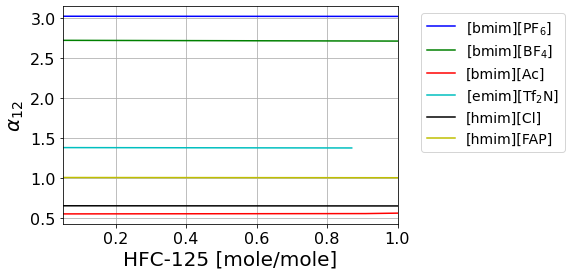

In [12]:
fig, ax = plt.subplots()

# plt.title('Volatility',fontsize=20)


plt.plot(R125_xPF6/0.026256131601646103,alphaPF6,"b",label="[bmim][PF$_6$]")
plt.plot(R125_xBF4/0.024921830858513377,alphaBF4,"g",label="[bmim][BF$_4$]")
plt.plot(R125_xAc/0.1286999978560163,alphaAc,"r",label="[bmim][Ac]")
plt.plot(R125_xTf2N/0.0589550084075442,alphaTf2N,"c",label="[emim][Tf$_2$N]")
plt.plot(R125_xCl/0.07644461244949777,alphaCl,"k",label="[hmim][Cl]")
plt.plot(R125_xFAP/0.07674055810530085,alphaFAP,"y",label="[hmim][FAP]")

plt.xlim(0.05,1)


plt.grid(True)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
plt.ylabel(r'$\alpha_{12}$',fontsize=20)
plt.xlabel('HFC-125 [mole/mole]',fontsize=20)
plt.legend(fontsize=14,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('vol_screen_1.png', bbox_inches='tight',dpi=300)
plt.show()

In [13]:
alpha2PF6 = np.zeros(len(R125_z))
alpha2BF4 = np.zeros(len(R125_z))
alpha2Ac = np.zeros(len(R125_z))
alpha2Tf2N = np.zeros(len(R125_z))
alpha2Cl = np.zeros(len(R125_z))
alpha2FAP = np.zeros(len(R125_z))

for i in range(len(R125_z)):
    alpha2PF6[i] = (R125_xPF6[i]/R125_yPF6[i])/(R32_xPF6[i]/R32_yPF6[i])
    alpha2BF4[i] = (R125_xBF4[i]/R125_yBF4[i])/(R32_xBF4[i]/R32_yBF4[i])
    alpha2Ac[i] = (R125_xAc[i]/R125_yAc[i])/(R32_xAc[i]/R32_yAc[i])
    alpha2Tf2N[i] = (R125_xTf2N[i]/R125_yTf2N[i])/(R32_xTf2N[i]/R32_yTf2N[i])
    alpha2Cl[i] = (R125_xCl[i]/R125_yCl[i])/(R32_xCl[i]/R32_yCl[i])
    alpha2FAP[i] = (R125_xFAP[i]/R125_yFAP[i])/(R32_xFAP[i]/R32_yFAP[i])

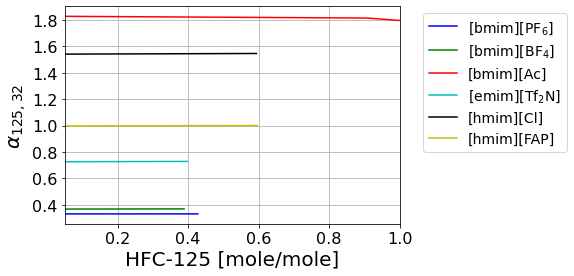

In [14]:
fig, ax = plt.subplots()

# plt.title('Volatility',fontsize=20)


plt.plot(R125_xPF6/0.0614109740837668,alpha2PF6,"b",label="[bmim][PF$_6$]")
plt.plot(R125_xBF4/0.0641004304467403,alpha2BF4,"g",label="[bmim][BF$_4$]")
plt.plot(R125_xAc/0.1286999978560163,alpha2Ac,"r",label="[bmim][Ac]")
plt.plot(R125_xTf2N/0.12869998181741257,alpha2Tf2N,"c",label="[emim][Tf$_2$N]")
plt.plot(R125_xCl/0.12869999501353052,alpha2Cl,"k",label="[hmim][Cl]")
plt.plot(R125_xFAP/0.1286999938461581,alpha2FAP,"y",label="[hmim][FAP]")
# plt.plot(R125_xPF6,alphaPF6,"b",label="[bmim][PF$_6$]")
# plt.plot(R125_xBF4,alphaBF4,"g",label="[bmim][BF$_4$]")
# plt.plot(R125_xAc,alphaAc,"r",label="[bmim][Ac]")
# plt.plot(R125_xTf2N,alphaTf2N,"c",label="[emim][Tf$_2$N]")
# plt.plot(R125_xCl,alphaCl,"k",label="[hmim][Cl]")
# plt.plot(R125_xFAP,alphaFAP,"y",label="[hmim][FAP]")
# plt.ylim(2.5,3.)
plt.xlim(0.05,1)


plt.grid(True)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
plt.ylabel(r'$\alpha_{125,32}$',fontsize=20)
plt.xlabel('HFC-125 [mole/mole]',fontsize=20)
plt.legend(fontsize=14,bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.savefig('vol_screen.png', bbox_inches='tight',dpi=300)
plt.show()